<div align="right"><sub>Algorithms and Data Structures, Semester 2, 2019</sub>
</div>


# Assessment 2
Due Date: Friday, November 15th, 5pm.

Value: 25% of course mark

Every numbered task is worth 1 mark.

---


##### Learning outcomes
- <font size="1">Perform basic efficiency analysis (Big-Oh) of algorithms widely used in computer science.</font>
- <font size="1">Implement and use state-of-the-art algorithms and data structures for a variety of computational problems.</font>
- <font size="1">Critically evaluate, choose and deploy appropriate algorithms and data structures for a variety of programming problems.</font>

## Searching

<ol start="1">

<li>
Implement a recursive version of the binary search algorithm.
   
</li></ol>

In [1]:
# Solution
def recursiveBinarySearch(arr, item):
    def _binary_search(item, first, last, arr):
        if last < first:
            return False
        if last == first:
            return arr[last] == item
        mid = (first + last) // 2
        if arr[mid] > item:
            last = mid
            return _binary_search(item, first, last, arr)
        elif arr[mid] < item:
            first = mid + 1
            return _binary_search(item, first, last, arr)
        else:
            return arr[mid] == item

    return _binary_search(item, 0, len(arr) - 1, arr)


In [2]:
# Test                   
testlist = [0, 1, 2, 8, 13, 17, 19, 32, 42,]
print(recursiveBinarySearch(testlist, 3))
print(recursiveBinarySearch(testlist, 42))

False
True


<ol start="2">
<li> 
    <b>(Hard)</b> Write an algorithm to find whether a value exists in a sorted 2D matrix of dimensions $n \times n$. A sorted 2D matrix is a matrix where all the elements in a row are sorted, and all the elements in a column are also sorted. Take advantage of the sorted nature of the matrix in order to come up with an algorithm that is able to carry the search in $O(n)$ time complexity instead of the naïve $O(n^2)$

$$\begin{bmatrix}
20  & 40 & 63 & 80 \\
30  & 50 & 80 &  90 \\
40  & 60 & 100 & 110 \\
50  & 65 & 105 & 150 \\    
\end{bmatrix}$$
</li>  </ol>

In [3]:
# Solution

def searchDown(matrix, searchItem, currentRow):
    if matrix[currentRow][0]>searchItem:
        searchDown(matrix, searchItem, currentRow-1)
    else:
        return currentRow
    
def searchAcross(matrix, searchItem, currentCol):
    if matrix[0][currentCol]>searchItem:
        searchDown(matrix, searchItem, currentCol-1)
    else:
        return currentCol
    
def incrementSearch(matrix, searchItem, col,row):
    if row>3 and col<=0:
        return False
    if matrix[row][col] == searchItem:
        return True


    if matrix[row][col] > searchItem:
        if col==0:
            return incrementSearch(matrix, searchItem, col,row+1)
        else:
            row=0
            return incrementSearch(matrix, searchItem, col-1,row)
    else:
        return incrementSearch(matrix, searchItem, col,row+1)
    
    
    
def findValueInSortedMatrix(matrix, searchItem):
    minRow = 0
    maxCol = 3
    if (matrix[0][0] > searchItem):
        return False;
    if (matrix[3][3] < searchItem):
        return False;
    return incrementSearch(matrix, searchItem, 3,0)

In [4]:
# Test
matrix = [[20, 40, 63, 80],
          [30, 50, 80, 90],
          [40, 60, 110, 110],
          [50, 65, 105, 150]]
print(findValueInSortedMatrix(matrix,60)) #Item exists
print(findValueInSortedMatrix(matrix,49)) # Item doesn't exist

True
False


## Hashing

<ol start="3">

<li>
Implement a map data structure that maps strings to values (striving to search in $O(1)$ time) and uses chaining for collision resolution. Monitor the load factor of the data structure every time you add a new value and try to implement the functionality so your data structure dynamically doubles its size whenever the load factor $\lambda$ exceeds 0.7. Briefly describe the computational cost you face when trying to double the size of the data Hash Table.
</li></ol>    

In [5]:
# Solution
#There is quite a high computatinal cost when doubling the size of a hash table.
#This is because you cannot just copy the existing hash table over. 
#You have to recalculate all of the previously used hashes to move them into their new slots in the hash.
#depending on the size and complexity of your table it can cost quite a lot computationally.
#It also uses triple the initial amount of memory when doubling the size because you have to have both the original table
#and the new double sized table opperating at the same time to move the objects over to the new hash table



class HashTable:
    def __init__(self,size):
        self.size = size
        self.filled = 0
        self.slots = [None] * self.size
        self.data = [None] * self.size
        
    def put(self,key,data):
        hashvalue = self.hashfunction(key,len(self.slots))

        if self.slots[hashvalue] == None:
            self.slots[hashvalue] = []
            self.data[hashvalue] = []
            self.filled+=1
        self.data[hashvalue].append(data)
        self.slots[hashvalue].append(key)
        
        loadFactor = self.filled/self.size
        if(loadFactor>0.7):
            self.reSize()
              
                
    def reSize(self):
        newHash = HashTable(self.size*2)
        for slot in self.size:
            if self.slots[slot]!=None:
                for item in len(self.slots[slot]):
                    newHash.put(self.slots[slot],self.data[slot])
        self.size = newHash.size
        self.filled = newHash.filled
        self.slots=newHash.slots
        self.data = newHash.data
    
    
    def hashfunction(self,key,size):
         return key%size

    def rehash(self,oldhash,size):
        return (oldhash+1)%size  

    def get(self,key):
        startslot = self.hashfunction(key,len(self.slots))

        data = None
        stop = False
        found = False
        position = startslot
        while self.slots[position] != None and not found and not stop:
            if self.slots[position] == key:
                found = True
                data = self.data[position]
            else:
                position=self.rehash(position,len(self.slots))
                if position == startslot:
                    stop = True
        return data

    def __getitem__(self,key):
        return self.get(key)

    def __setitem__(self,key,data):
        self.put(key,data)                    

## Sorting



<ol start="4">

<li>
Insertion sort is very inefficient because of the number of comparisons needed on the growing sorted sublists. Take advantage of binary search to find the proper location to insert the selected item at each iteration and thus reduce the number of necessary comparisons carried out by insertion sort to $O(n log(n))$.
</li></ol>       

In [6]:
# Solution
def binary_search(arr, low, high, key):
    if low == high:
        if arr[low] > key:
            return low
        else:
            return low + 1
    if low > high:
        return low
    mid = (low + high) // 2
    if arr[mid] < key:
        return binary_search(arr, mid + 1, high, key)
    elif arr[mid] > key:
        return binary_search(arr, low, mid - 1, key)
    else:
        return mid


def BinarySearchEnhancedInsertionSort(arr):
    for i in range(1, len(arr)):
        key = arr[i]
        ind = binary_search(arr, 0, i - 1, key)
        arr = arr[:ind] + [key] + arr[ind:i] + arr[i + 1:]
    return arr


In [7]:
#Test
print("Sorted array:")
print(BinarySearchEnhancedInsertionSort([37, 23, 0, 17, 12, 72, 31,46, 100, 88, 54]))

Sorted array:
[0, 12, 17, 23, 31, 37, 46, 54, 72, 88, 100]


## Thinking exercise

<ol start="5">

<li>
    <b>(Hard)</b> Write an algorithm that takes in a list of $n$ integers in the range $0$ to $k$, preprocesses its input and then is able to answer queries about how many of the $n$ integers fall into a range $[a \dots b]$ in $O(1)$ time. The preprocessing running time of the algorithm should be at most $\Theta(n + k)$. 
that is, for an input such as `a=[2,4,6,8,10]`, $n=5$ and the range is $ 2$ to $k=10$. After preprocessing, your algorithm should be able to return how many elements in `a` fall within a given range. For instance:
</li></ol> 

- `ElementsInIntervalCounterObject.numberOfElementsFallingWithin(4,8)` -> 3
- `ElementsInIntervalCounterObject.numberOfElementsFallingWithin(5,9)` -> 2
- `ElementsInIntervalCounterObject.numberOfElementsFallingWithin(5,5)` -> 0
- `ElementsInIntervalCounterObject.numberOfElementsFallingWithin(1,10)` -> 5

I recommend that you implement the algorithm within a Python class so you can use the constructor for doing the preprocessing.

In [8]:
# Solution


class ElementsInIntervalCounter:
    def __init__(self, array):
        self.array = array
        self.array.sort()
        self.listSize = len(array)
    
    
    def findLowerIndex(self,x): 
        l = 0
        h = self.listSize-1
        while (l <= h): 
            mid = int((l + h)/2) 
            if (self.array[mid] >= x): 
                h = mid - 1
            else: 
                l = mid + 1
        return l 
    
    def findUpperIndex(self,x): 
        l = 0
        h = self.listSize-1
        while (l <= h): 
            mid = int((l + h)/2) 
            if (self.array[mid] <= x): 
                l = mid + 1
            else: 
                h = mid - 1
        return h 
    
    def numberOfElementsFallingWithin(self,x,y):
        count = self.findUpperIndex(y) - self.findLowerIndex(x) + 1 
        return count

In [9]:
# Test
ElementsInIntervalCounterObject = ElementsInIntervalCounter([2,4,6,8,10])
print(ElementsInIntervalCounterObject.numberOfElementsFallingWithin(4,8))
print(ElementsInIntervalCounterObject.numberOfElementsFallingWithin(5,9))
print(ElementsInIntervalCounterObject.numberOfElementsFallingWithin(5,5))
print(ElementsInIntervalCounterObject.numberOfElementsFallingWithin(1,10))

3
2
0
5


## Probability

<ol start="6">

<li>
Let's create a very simple Bayesian spam filter. In imaginary land, emails are written with a vocabulary of only 6 words. Spam emails and not spam emails use the  six word vocabulary with different frequencies. 80% of the email traffic in imaginary land is spam and the reminder 20% is legitimate emails. You are given the task of creating a spam filter detection algorithm. You decide that is a good idea to exploit your knowledge of Bayesian statistics to tackle this problem. Thus, create an algorithm that given an input sentence (the email) returns the probability that the input sentence is spam and the probability that the input sentence is not spam.
</li>

Hint: the first thing to do is to estimate the probabilities of the vocabulary within the spam and not-spam categories

| Word  | Spam  |  Not spam |
|---|---|---|
| viagra| 0.26  |  0.05 |
| money | ... | ... |
| sex   | ... | ...  |
| dear  | ...  | ...  |
| friend  | ...  | ... |
| meet  | ... | ...  |

In [ ]:
# Solution
def bayesianSpamFilter(email):
    words = []
    spamAmount = []
    spamWords = 0
    nonSpamWords= 0
    
    processHistorical(words, spamAmount, spamWords,spamEmails)
    nonSpamAmount=[0] * len(words)
    processHistorical(words, nonSpamAmount, nonSpamWords,notSpamEmails)
    spam = 0
    nonSpam = 0
    for word in email.split():
        spam = spam+spamAmount[words.index(word)]
        nonSpam = nonSpam+nonSpamAmount[words.index(word)]
    spam = spam*0.8
    nonSpam = nonSpam*0.2
    returnSpam = spam/(spam+nonSpam)
    returnNonSpam = nonSpam/(spam+nonSpam)
    return returnSpam, returnNonSpam
    
def processHistorical(words, amounts, wordCount, emails):
    for y in emails:
        for word in y.split():
            if word in words:
                amounts[words.index(word)]+=1
            else:
                words.append(word)
                amounts.append(1)
            wordCount+=1
    for x in amounts:
        x=x/wordCount
        



In [ ]:
# Test

# historical data of spam and not spam emails:
spamEmails=["viagra sex meet money sex", "dear viagra sex viagra viagra", "sex friend viagra", "sex money sex", "sex friend money"]
notSpamEmails=["dear friend money meet", "meet dear viagra friend", "friend meet dear", "dear dear friend", "dear sex", "sex dear"]


s1 = "dear friend meet"
pSpam, pNotSpam = bayesianSpamFilter(s1)
print("Sentence: \"%s\" Probably spam: %f Probability not spam: %f" % (s1, pSpam, pNotSpam))

s2 = "viagra money sex dear money"
pSpam, pNotSpam = bayesianSpamFilter(s2)
print("Sentence: \"%s\" Probably spam: %f Probability not spam: %f" % (s2, pSpam, pNotSpam))

s3 = "dear friend meet sex sex money viagra meet"
pSpam, pNotSpam = bayesianSpamFilter(s3)
print("Sentence: \"%s\" Probably spam: %f Probability not spam: %f" % (s3, pSpam, pNotSpam))

## Stochastic Algorithms and the Monte Carlo Method

<ol start="7">

<li>
    Using the explanation given in lecture <i>19 Stochastic Algorithms</i>, Use the Monte Carlo method to estimate $\Large\pi$ (3.141592...) to 3 significant digits 
</li></ol>

In [10]:
import random

trials = 10000000
hits = 0
radius = 1

for trial in range(trials):
    x = random.random()
    y = random.random()
    test = (x*x)+(y*y)
    if (test<radius):
        hits=hits+1
        
result = (hits/trials)*4
print(result)


3.1421396


## Statistics


<ol start="8">

<li>
The company you have been working for has been purchasing a certain type of electronic device from 2 different manufacturers A and B. The company has also recorded the amount of days that the device works until it completely fails. Given that one device has failed after 150 days but you don't know its manufacturer, calculate how much more likely it is that such a device came from one manufacturer than the other given the historical empirical data recorded by the company previously. 

<i>Hint:</i> plotting the probability density function of both manufacturers failing times will help you in finding a solution to this problem.
</li></ol>

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import Markdown, display
import numpy as np
from scipy import stats
import pandas as pd
import seaborn as sns

timeToFailureA= np.array([124.62144667, 106.13364854, 117.74858357,  98.74290026,
       103.3165112 , 109.72744164,  74.01571789, 106.96158141,
       102.28982005,  99.93051826,  76.60901943,  80.39714236,
        55.02793069,  85.45208982, 104.22170406,  85.99599947,
       112.59869994,  95.79109313,  83.50542866, 119.92770958,
        81.8058076 , 102.76322206,  99.67864073,  87.89222674,
        71.25176532,  74.88191707, 117.17865584, 109.09116925,
       124.53409657,  87.8173293 ,  99.85197306, 124.04364403,
       102.31833973, 119.2685315 , 112.25864129,  74.06716133,
        97.05767201,  83.66841935,  87.02851635,  91.66139228,
       104.88832752, 115.1732398 , 103.63461105,  78.2541082 ,
        74.35189505, 120.79622949, 106.16998993, 126.44951788,
        80.11259273, 112.08673548, 112.80531948, 122.5683024 ,
       120.50591968, 121.00171553,  70.26754123, 107.70698575,
       105.5337795 ,  86.12288747,  82.52946909, 115.65037522,
        79.24456862,  69.77690732,  91.86320981, 117.09220437,
       118.01883261,  98.33183627, 107.19247907,  97.10067157,
        85.06162182, 122.43982811,  71.85322262,  88.30531166,
        73.58362537,  87.83562595,  88.37756428, 131.28037359,
        92.65581904,  90.66214423,  97.51430688, 111.31124483,
       112.65648278, 118.5525132 ,  76.4713513 ,  98.49046739,
        74.24616398, 109.50293034,  88.4381382 ,  85.70565343,
       103.29975178,  83.72179567, 121.80909889, 128.71077746,
        75.52340396, 103.13401586,  94.65296786,  99.66973694,
        87.94468956, 126.09744162,  78.68529841,  95.27664898])
    
timeToFailureB= np.array([194.60055076, 127.84076582,  72.63459054,  72.14816055,
       113.55202239,  50.10477096, 116.65576045,  70.98809983,
        59.13363405,  82.27853051,  86.21977609, 122.06109083,
        39.79661448,  78.23934262, 138.79338423,  95.03231458,
        42.76667884,  72.52572671,  80.03069495,  40.64781381,
        62.95969861,  95.58983023, 124.48673192, 101.20750649,
        75.8133936 ,  30.28037538, 102.57269689, 144.30813776,
         8.349275  ,  87.56214613,  51.79287217,  92.36511375,
       132.2346495 ,  62.20459029, 105.31097184, 101.22537309,
        93.42104048,  72.02333095,  70.4659164 ,  73.40353751,
        43.78113965, 149.42580924,  65.80027562,  81.36351794,
        41.52233909,  72.17188767,  82.3835437 ,  92.35621193,
       111.01681144, 122.77975357,  88.7625561 ,  93.73549594,
       149.98888888,  98.02150134,  22.14345481,  89.31296595,
        90.81117642, 104.66191168,   8.64838967,  70.88562985,
        74.49570711, 103.97872516, 121.5995122 , 140.61780803,
        44.46878759,  76.73994346,  89.6503097 , 107.5186432 ,
        56.11700449, 152.05016799,  85.82639732,  21.0378077 ,
        93.06672928, 100.63602946, 108.24573072, 108.02669327,
       125.7566677 ,  89.48259258, 108.94840528, 101.68254614,
       106.09409152, 129.8037404 ,  89.62153564, 127.1854666 ,
        61.20319795,  96.35222993,  85.89363838,  93.17040435,
        87.61693674, 117.79106743,  97.59089942, 108.0501719 ,
        54.71134006,  48.52256069, 101.75135174,  29.61525461,
        40.66256675,  90.28140209, 108.52980168,  69.62657946])

It is 11 times more likely that the product came from company A


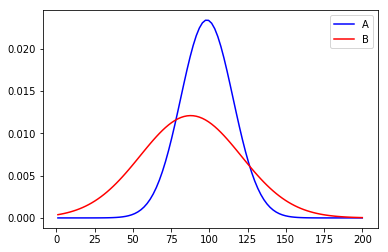

In [12]:
#solution
import scipy.stats as st
%matplotlib inline
import scipy
import numpy as np
import matplotlib.pyplot as plt

meanb = scipy.mean(timeToFailureB)
stdB = scipy.std(timeToFailureB)

meanA = scipy.mean(timeToFailureA)
stdA = scipy.std(timeToFailureA)

companyOne = scipy.stats.norm(meanA,stdA)
companyTwo = scipy.stats.norm(meanb, stdB)
x = np.linspace(1, 200, 100)

plt.plot(x, companyOne.pdf(x), color='blue',label="A");
plt.plot(x, companyTwo.pdf(x), color='red',label="B");
plt.legend()


chance = companyOne.pdf(150)/companyTwo.pdf(150)*100

print("It is %d times more likely that the product came from company A" %chance )

## Trees

<ol start="9">

<li>Using the <i>BinaryTree</i> class implementation from  <i>practical1</i> in the <i>trees and tree algorithms lecture</i> and a Queue data structure, implement a breadth first traversal of a binary tree, like the following:</li>
</li></ol>

![](./images/bsf.png)

In [13]:
#Solution
class BinaryTree:
    def __init__(self,rootObj):
        self.key = rootObj
        self.leftChild = None
        self.rightChild = None

    def insertLeft(self,newNode):
        if self.leftChild == None:
            self.leftChild = BinaryTree(newNode)
        else:
            t = BinaryTree(newNode)
            t.leftChild = self.leftChild
            self.leftChild = t

    def insertRight(self,newNode):
        if self.rightChild == None:
            self.rightChild = BinaryTree(newNode)
        else:
            t = BinaryTree(newNode)
            t.rightChild = self.rightChild
            self.rightChild = t


    def getRightChild(self):
        return self.rightChild

    def getLeftChild(self):
        return self.leftChild

    def setRootVal(self,obj):
        self.key = obj

    def getRootVal(self):
        return self.key
    
def breadth_first_traversal(tree):
    queue = []
    queue.append(tree)
    while(len(queue)>0):
        tempValue = queue.pop(0)
        print(tempValue.getRootVal())
        if tempValue.leftChild!=None:
            queue.append(tempValue.getLeftChild())
        if tempValue.rightChild!=None:
            queue.append(tempValue.getRightChild())
            
    

In [14]:
# Test    
t = BinaryTree(1)
t.insertLeft(2)
t.getLeftChild().insertLeft(4)
t.getLeftChild().insertRight(5)
t.insertRight(3)

#t.getRightChild().getRootVal()
breadth_first_traversal(t)

1
2
3
4
5


<ol start="10">
    <li>
        Using the `buildHeap` from the <i>practical2</i> in the <i>trees and tree algorithms lecture</i>, write a sorting function that can sort a list in $O(n log(n))$ time.
</li></ol>

In [15]:
#Solution
class BinaryHeap:
    def __init__(self):
        self.heapList = [0]
        self.currentSize = 0        
        
    def percUp(self,i):
        while i // 2 > 0:
            if self.heapList[i] < self.heapList[i // 2]:
                tmp = self.heapList[i // 2]
                self.heapList[i // 2] = self.heapList[i]
                self.heapList[i] = tmp
            i = i // 2        
          
    def insert(self,k):
        self.heapList.append(k)
        self.currentSize = self.currentSize + 1
        self.percUp(self.currentSize)          
        
    def percDown(self,i):
        while (i * 2) <= self.currentSize:
            mc = self.minChild(i)
            if self.heapList[i] > self.heapList[mc]:
                tmp = self.heapList[i]
                self.heapList[i] = self.heapList[mc]
                self.heapList[mc] = tmp
            i = mc

    def minChild(self,i):
        if i * 2 + 1 > self.currentSize:
            return i * 2
        else:
            if self.heapList[i*2] < self.heapList[i*2+1]:
                return i * 2
            else:
                return i * 2 + 1        
                
    def delMin(self):
        retval = self.heapList[1]
        self.heapList[1] = self.heapList[self.currentSize]
        self.currentSize = self.currentSize - 1
        self.heapList.pop()
        self.percDown(1)
        return retval
    
    def buildHeap(self,alist):
        i = len(alist) // 2
        self.currentSize = len(alist)
        self.heapList = [0] + alist[:]
        while (i > 0):
            self.percDown(i)
            i = i - 1
    
    def heapSort(self, list):
        self.buildHeap(list)
        newList=[]
        for num in range(self.currentSize):
            newList.append(self.delMin())
        return newList

In [16]:
#Test
bh = BinaryHeap()
s=bh.heapSort([9,14,11,17,18,19, 21, 33, 27])
print(s)

[9, 11, 14, 17, 18, 19, 21, 27, 33]


## Binary search trees

<ol start="11">

<li>
Write a function (or a couple of functions) that are able to check whether a binary tree is a valid binary search tree (BST). Recall that a binary search tree relies on the <i>bst</i> property: keys that are less than the parent are found in the left subtree, and keys that are greater than the parent are found in the right subtree
</li>

In [17]:
#Solution
def validateBinaryTree(tree):
    branches=[]
    branches.append(tree.root)
    while(len(branches)>0):
        branch = branches.pop(0)
        if branch.hasRightChild():
            if branch.rightChild.key>branch.key:
                branches.append(branch.rightChild)
            else:
                return False   
        if branch.hasLeftChild():
            if branch.leftChild.key<branch.key:
                branches.append(branch.leftChild)
            else:
                return False
    return True

Use the following code that creates a binary search tree to check your solution:

In [18]:
# Test
from utils import TreeNode, BinarySearchTree

mytree = BinarySearchTree()
mytree.put(1,1)
mytree.put(3,3)
mytree.put(2,2)

so we have created a binary search tree that looks like this:

`
1
 \
  3
 /   
2
`

check that is a valid binary search tree with the  `validate` function you should have implemented above

In [19]:
validateBinaryTree(mytree)

True

Let's break the binary search tree property:

In [20]:
mytree.root.key = 5

now the tree looks like this:

`
5
 \
  3
 /   
2
`

and is clearly not a binary search tree (the right child of the root key is not larger than the root key)

our `validateBinaryTree` function should detect that this object is no longer a binary search three:

In [21]:
validateBinaryTree(mytree)

False

<ol start="12">

<li>
What is the performance problem of the following piece of code? If there is a problem, fix it.
</li>

In [22]:
bst = BinarySearchTree()
bst.put(30,'a')
bst.put(40,'b')
bst.put(50,'c')
bst.put(60,'d')
bst.put(70,'e')
bst.put(80,'f')


from utils import BinarySearchTree, TreeNode
class AVLTree(BinarySearchTree):

    def _put(self,key,val,currentNode):
        if key < currentNode.key:
            if currentNode.hasLeftChild():
                self._put(key,val,currentNode.leftChild)
            else:
                currentNode.leftChild = TreeNode(key,val,parent=currentNode)
                self.updateBalance(currentNode.leftChild)
        else:
            if currentNode.hasRightChild():
                self._put(key,val,currentNode.rightChild)
            else:
                currentNode.rightChild = TreeNode(key,val,parent=currentNode)
                self.updateBalance(currentNode.rightChild)                

    def updateBalance(self,node):
        if node.balanceFactor > 1 or node.balanceFactor < -1:
            self.rebalance(node)
            return
        if node.parent != None:
            if node.isLeftChild():
                node.parent.balanceFactor += 1
            elif node.isRightChild():
                node.parent.balanceFactor -= 1

            if node.parent.balanceFactor != 0:
                self.updateBalance(node.parent)

    def rebalance(self,node):
        if node.balanceFactor < 0:
            if node.rightChild.balanceFactor > 0:
                # Do an LR Rotation
                self.rotateRight(node.rightChild)
                self.rotateLeft(node)
            else:
                # single left
                self.rotateLeft(node)
        elif node.balanceFactor > 0:
            if node.leftChild.balanceFactor < 0:
                # Do an RL Rotation
                self.rotateLeft(node.leftChild)
                self.rotateRight(node)
            else:
                # single right
                self.rotateRight(node)

    def rotateLeft(self,rotRoot):
        newRoot = rotRoot.rightChild
        rotRoot.rightChild = newRoot.leftChild
        if newRoot.leftChild != None:
            newRoot.leftChild.parent = rotRoot
        newRoot.parent = rotRoot.parent
        if rotRoot.isRoot():
            self.root = newRoot
        else:
            if rotRoot.isLeftChild():
                rotRoot.parent.leftChild = newRoot
            else:
                rotRoot.parent.rightChild = newRoot
        newRoot.leftChild = rotRoot
        rotRoot.parent = newRoot
        rotRoot.balanceFactor = rotRoot.balanceFactor + 1 - min(newRoot.balanceFactor, 0)
        newRoot.balanceFactor = newRoot.balanceFactor + 1 + max(rotRoot.balanceFactor, 0)


    def rotateRight(self,rotRoot):
        newRoot = rotRoot.leftChild
        rotRoot.leftChild = newRoot.rightChild
        if newRoot.rightChild != None:
            newRoot.rightChild.parent = rotRoot
        newRoot.parent = rotRoot.parent
        if rotRoot.isRoot():
            self.root = newRoot
        else:
            if rotRoot.isRightChild():
                rotRoot.parent.rightChild = newRoot
            else:
                rotRoot.parent.leftChild = newRoot
        newRoot.rightChild = rotRoot
        rotRoot.parent = newRoot
        rotRoot.balanceFactor = rotRoot.balanceFactor - 1 - max(newRoot.balanceFactor, 0)
        newRoot.balanceFactor = newRoot.balanceFactor - 1 + min(rotRoot.balanceFactor, 0)
        

In [23]:
#Test
avl = AVLTree()
avl.put(30,'a')
avl.put(40,'b')
avl.put(50,'c')
avl.put(60,'d')
avl.put(70,'e')
avl.put(80,'f')
avl.root.balanceFactor

0

## Genetic algorithms

<ol start="13">

<li>
    <b>(Hard)</b>... but fun AND powerful technique if you get it working!). In this task you need to create a genetic/evolutionary algorithm that evolves a randomly initialized "chromosome" into an approximation to a target image. 
</li>
</ol>

- As fitness function, I suggest that you calculate the matrix difference between the target image and a candidate solution from the population and then take the norm of the matrix `np.linalg.norm()` to get a scalar number that quantifies the "size" of the matrix (i.e. the distance between the target image and a candidate solution). Notice that with such a fitness function, the fittest candidates solutions will have a low score (i.e. low distance to the target function)

- To ensure that the required computation time does not get too large, we will reduce the target image to a relatively low resolution (50x50 pixels)

- Use a population size of around 500 chromosomes/individuals

- I recommend that you use a mutation rate of around 1%

- I recommend that you use random crossover points to speed up convergence upon the solution

- your solution should be computationally efficient, I should not need more than 5 minutes to run it

- Store partial solutions during the evolutionary process in a variable list named `solutionsList` so I can test that your algorithm works

In [ ]:
#some preliminary code to help you get started
%matplotlib inline
import matplotlib.pyplot as plt
import scipy
from scipy import misc
import numpy as np
import sys
import imageio
import skimage.transform


#you can work with any one of the following images
#target = misc.imread('./images/lena.png')
target = imageio.imread('./images/lena.png')
# target = imageio.imread('./images/sm.jpg')[:,:,0]
# target = imageio.imread('./images/ce.jpg')[:,:,0]

#New way of resizing and normalization:
#we decrease the resolution of the target image to 50 x 50 pixels in order to speed up computation time
#pixel values are also normalized by default from a [0-255] range to a more convenient [0-1] range 
target=skimage.transform.resize(target, (50,50), mode= 'reflect',anti_aliasing=True) 

#Old way of resizing and normalization:
#we decrease the resolution of the target image to 50 x 50 pixels in order to speed up computation time
#target=scipy.misc.imresize(target, (50,50))
#we normalize the pixel values manually from a range [0-255] to a more convenient range [0-1]
#target = target/255

plt.imshow(target)

xDim=target.shape[0]
yDim=target.shape[1]
print(xDim,yDim)

#dimensions of chromosomes (i.e. candidate solutions in the population)
dim =xDim*yDim

#we transform our target into a one-dimensional array for ease of computation
target1D=target.flatten() 

#the mutation rate you should use 
mutationRate= 0.0005 #0.01

# Population size
populationSize = 500

In [ ]:
#Solution
from numpy import random

class Individual:
    def __init__(self,rootObj):
        self.dna = rootObj
        self.fitness = 0
        
    def upDateFitnessNum(self):
        fitness = np.sum((self.dna.astype("float") - target.astype("float")) ** 2)
        fitness /= float(self.dna.shape[0] * target.shape[1])
        return fitness
    
    def __lt__(self, other):
         return self.fitness < other.fitness

def breed(parent1,parent2,newPopulation):
    #first loop
    dnaSwap = False
    newDna1 = []
    newDna2 = []
    for dnaStrand in range(50):
        #secondLoop
        dnaStrand1 = []
        dnaStrand2 = []
        for chrom in range(50):
            dnaStrand1.append(parent1.dna[dnaStrand][chrom])
            dnaStrand2.append(parent2.dna[dnaStrand][chrom])
        #for chrom in range(25):
         #   dnaStrand2.append(parent1.dna[dnaStrand][chrom])
         #   dnaStrand1.append(parent2.dna[dnaStrand][chrom])
        newDna1.append(dnaStrand1)
        newDna2.append(dnaStrand2)
    #newPopulation.append(createMutants(Individual(np.array(newDna1, dtype=np.int)),mutationRate))
    #newPopulation.append(createMutants(Individual(np.array(newDna2, dtype=np.int)),mutationRate))
    newPopulation.append(Individual(np.array(newDna1, dtype=np.int)))
    newPopulation.append(Individual(np.array(newDna2, dtype=np.int)))
    return newPopulation

def createMutants(originalChild, mutationRate):
    if(np.random.randint(10000)/10000<mutationRate):
        print("Mutant!")
        return Individual(random.random((50,50)))
    else:
        return originalChild
    
    
    
def selectParent(population, k):
    best = None
    for i in range(k):
        individual = population[random.randint(499)]
        if (best == None) or individual.fitness > best.fitness:
            best = individual
    return best 
    
def runGeneticTesting(population):
    #updating fitness
    for x in range(populationSize):
        population[x].fitness = population[x].upDateFitnessNum()
    population.sort()       
    #Breeding
    #get top 25% of population
    newPopulation=[]
    while len(newPopulation)<populationSize:
        parent1 = selectParent(population, 2)
        parent2 = selectParent(population, 2)
        newPopulation = breed(parent1,parent2,newPopulation)   
    del population[250:populationSize]
    #print(len(newPopulation))
    #print(len(population))
    population=population+newPopulation
    #print("final")
    #print(len(population))
    return population
    
    
def createPopulation():
    population = []
    for x in range(populationSize):    
        population.append(Individual(random.random((50,50))))
    return population
        
    
halfPop = populationSize/2
population = createPopulation()


for x in range(2):
    #print(population[1].fitness)
    #print(population[499].fitness)
    plt.figure(figsize=(9, 6))
    plt.imshow(population[1].dna)
    for y in range(20):
        population = runGeneticTesting(population)
    print(x)
    


This is an illustration of the sample outputs I get during the evolutionary process every 500 steps for a total of 10,000 steps. The computation takes about five minutes in my modest? laptop. Obviously, better results can be achieved with more computational steps, a larger population or fine-tuning parameters such as the mutation rate, the fitness selection algorithm or the cross over point criteria, but as a proof of concept, this should be enough. Notice that the algorithm progresses very fast in terms of fitness at the beginning of the evolutionary procedure and eventually slows down towards the end.

In [ ]:
%matplotlib inline
for i in solutionsList:
    plt.figure(figsize=(9, 6))
    plt.imshow(i)

## Graphs

<ol start="14">

<li>
The following graph `f` describes flight connections between different cities in the world. You're trying to create a flight search engine that minimizes the number of flights to get from one city to another. Show the solution to this problem by finding the shortest path from Dunedin to Rome.
</li>

In [24]:
from utils import Graph, Vertex, Queue
f = Graph()
f.addVertex('Dunedin');f.addVertex('Wellington');f.addVertex('Auckland');f.addVertex('Queenstown');f.addVertex('Christchurch');
f.addVertex('Tauranga');f.addVertex('London');f.addVertex('New York');f.addVertex('Berlin');f.addVertex('Beijing');
f.addVertex('Tokyo');f.addVertex('Moscow');f.addVertex('Rome');f.addVertex('Paris');f.addVertex('Brussels');
f.addVertex('Washington DC');f.addVertex('Los Angeles');f.addVertex('San Francisco');f.addVertex('Dubai');
f.addVertex('New York'); f.addVertex('Santiago de Chile')
            
f.addEdge('Dunedin','Auckland')
f.addEdge('Auckland','Beijing')
f.addEdge('Tokyo','London')
f.addEdge('Dunedin','Wellington')
f.addEdge('London','Madrid')
f.addEdge('Madrid','Rome')
f.addEdge('Tokyo','Rome') #
f.addEdge('Auckland','Santiago de Chile')
f.addEdge('Auckland','San Francisco')
f.addEdge('Santiago de Chile','New York')
f.addEdge('Auckland','Dubai')
f.addEdge('Dubai','Rome')
f.addEdge('Beijing','Tokyo')
f.addEdge('San Francisco','Tokyo')
f.addEdge('San Francisco','New York')
f.addEdge('Los Angeles','San Francisco')
f.addEdge('New York','London')
f.addEdge('New York','London')

In [25]:
#Solution
def bfs(g,start):
    start.setDistance(0)
    start.setPred(None)
    vertQueue = Queue()
    vertQueue.enqueue(start)
    while (vertQueue.size() > 0):
        currentVert = vertQueue.dequeue()
        for nbr in currentVert.getConnections():
            if (nbr.getColor() == 'white'):
                nbr.setColor('gray')
                nbr.setDistance(currentVert.getDistance() + 1)
                nbr.setPred(currentVert)
                vertQueue.enqueue(nbr)
        currentVert.setColor('black')

def traverse(y):
    x = y
    while (x.getPred()):
        print(x.getId())
        x = x.getPred()
    print(x.getId())


bfs(f, f.getVertex('Dunedin'))

traverse(f.getVertex('Rome'))

Rome
Dubai
Auckland
Dunedin


<ol start="15">

<li>
The following graph represents latencies (in seconds) within a computer network for packages to travel from one router to another. Using an appropriate algorithm estimate what would be the minimum total latency to go from `routerA' to 'routerK'. Also, extract from the computational graph the optimal route.
</li>

![](./images/routerNetwork.png)

In [34]:
from utils import PriorityQueue, Graph, Vertex
                
g = Graph()
g.addVertex('routerA');g.addVertex('routerB');g.addVertex('routerC');g.addVertex('routerD');g.addVertex('routerE');
g.addVertex('routerF');g.addVertex('routerG');g.addVertex('routerH');g.addVertex('routerI');g.addVertex('routerJ');
g.addVertex('routerK');

g.addEdge('routerA','routerB',1)
g.addEdge('routerA','routerC',1)
g.addEdge('routerA','routerD',2)

g.addEdge('routerB','routerE',3)
g.addEdge('routerB','routerF',4)
g.addEdge('routerC','routerG',3)
g.addEdge('routerD','routerG',1)

g.addEdge('routerE','routerH',3)
g.addEdge('routerE','routerI',3)
g.addEdge('routerE','routerF',2)
g.addEdge('routerF','routerI',1)
g.addEdge('routerG','routerF',4)
g.addEdge('routerG','routerI',2)
g.addEdge('routerG','routerJ',4)

g.addEdge('routerH','routerK',1)
g.addEdge('routerH','routerI',1)
g.addEdge('routerI','routerK',2)
g.addEdge('routerJ','routerK',1)

In [35]:
#Solution
def dijkstra(aGraph,start):
    pq = PriorityQueue()
    start.setDistance(0)
    pq.buildHeap([(v.getDistance(),v) for v in aGraph])
    while not pq.isEmpty():
        currentVert = pq.delMin()
        for nextVert in currentVert.getConnections():
            newDist = currentVert.getDistance() + currentVert.getWeight(nextVert)
            if newDist < nextVert.getDistance():
                nextVert.setDistance( newDist )
                nextVert.setPred(currentVert)
                pq.decreaseKey(nextVert,newDist)
    
def shortest(v, path,lat):
    if v.getPred():
        path.append(v.getPred().getId())
        lat+=v.getDistance()
        shortest(v.getPred(), path,lat)
    return lat



dijkstra(g,g.getVertex('routerA'))

target = g.getVertex('routerK')
path = [target.getId()]
dist = 0
dist = shortest(target, path, dist)
print('The shortest path : %s' %(path[::-1]))
print('The minimum total latency is %d' %dist)

The shortest path : ['routerA', 'routerD', 'routerG', 'routerI', 'routerK']
The minimum total latency is 7


<ol start="16">

<li>
This question does not require you to write any code, but perhaps it would be helpful for you to grab a pen and a paper and think hard about it. Let's say you need to explore a huge tree. Imagine you are creating a web crawler that is trying to index a huge Internet domain (for example www.amazon.com) by following every link found during the crawling. The crawling starts from the root URL of the domain and proceeds by recursively following every link found in each html page. The only requirement is that each link to be followed has to point within the domain (that is, a link found to an outside domain for example www.google.com is not followed, otherwise the crawling would not end in a reasonable amount of time). Links that have already been parsed are ignored. In essence, you are trying to traverse the tree represented by the domain. You are trying to decide whether to implement breadth first search or depth first search to manage the list of links popping up during crawling and that need to be followed up by the crawler. Which approach would be easier on RAM memory? (i.e. consumes less memory) <i>Hint:</i> Breadth first search builds a search tree one level at a time and stores every link found into a Queue. Depth first search creates a search tree by exploring one branch of the tree as deeply as possible (usually with a maximum depth threshold constraint) and stores every link found into a Stack. 
</li>
</ol>

**Explain your reasoning**

In [ ]:
#Write your answer here
#Depth first because it will use less memory. Stacks are FIFO so items will be removed quicker and processed quicker.
#It will also be better because it will use the groupding idea. Website pages can be grouped together which will happen
#if you use a depth first but a breadth first will not do this grouping.

## Cryptocurrencies

A hash function is a function that takes as input a variable length sequence of bytes and converts it to a fixed length sequence. It is a one way function. This means if `f` is the hashing function, calculating `f(x)` is pretty fast and simple, but trying to obtain `x` again from `f(x)` is hard or impossible. The value returned by a hash function is often called a hash, message digest, hash value, or checksum. Most of the time a hash function will produce a unique output for a given input. However depending on the algorithm, there is a possibility to find a collision due to the mathematical theory behind these functions. That is, two different inputs mapping to the same hash value.

Hash functions are used inside some cryptographic algorithms (such as cryptocurrencies), in digital signatures, message authentication codes, manipulation detection, fingerprints, checksums (message integrity check), hash tables, password storage and much more.

<ol start="17">

<li>
Your task in this exercise is similar to Bitcoin mining: find a string of length 4 (i.e. `abcd`) containing only upper or lower case characters (i.e. `abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ`) whose hexadecimal SHA256 Hash digest starts with 6 0s (i.e. '000000')
</li>
</ol>

In [36]:
import string
import hashlib

hash_object = hashlib.sha256(b'abcd')
hex_dig = hash_object.hexdigest()
print(hex_dig)

88d4266fd4e6338d13b845fcf289579d209c897823b9217da3e161936f031589


In [37]:
# Solution
import random
found=False
letterOptions = "abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ"
finalHex = ""
while(found==False):
    testString = "b'"
    for x in range(4):
        testString+= letterOptions[random.randint(0,51)]
    testString+="'"
    hash_object = hashlib.sha256(testString.encode('utf-8'))
    finalHex = hash_object.hexdigest()
    if finalHex[:6]=="000000":
        found=True
print(finalHex)

000000b70c4efc25667a932847eebc1b604228914ebb2d76993de28cdd4717e4


### Deliverables

<ol start="18">
<li>You should hand in this python notebook file (.ipynb) containing all the necessary code to answer each of the previously enumerated tasks. Answer each question in its corresponding code cell. Use comments also to provide answers to questions expecting a natural language answer.  After you implement a solution to a problem, use a bit of additional code to test/demonstrate that your solution works. Please, make sure your code runs smoothly so I can execute it in my computer. Name your Python notebook according to the following pattern: `yourLastName_ADS_A2.ipynb`.  
</li></ol> 

Create your own private repository for you to work on the assignment by using the following link: [https://classroom.github.com/a/SwVYKsCx](https://classroom.github.com/a/SwVYKsCx) I will subsequently fetch the repository you created on the date the assignment is due.